In [24]:
import numpy as np 
import pandas as pd
import torch

# 1. Loading Data

In [25]:
X_train = pd.read_csv("../Xtrain_hgcGIrA.csv")
y = pd.read_csv("../Ytrain_yL5OjS4.csv")

X_test = pd.read_csv("../Xtest.csv")
y_test = pd.read_csv("../Ysample_iX1anNa.csv")

In [26]:
X_train

,date,train,way,station,hour,composition,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3
0,2019-01-07,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.201,0.138,0.091
1,2019-01-08,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.204,0.152,0.106
2,2019-01-10,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.213,0.153,0.111
3,2019-01-11,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.213,0.152,0.108
4,2019-01-14,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.210,0.147,0.096
...,...,...,...,...,...,...,...,...,...,...,...,...
31114,2019-05-13,9,0,BE,08:00:00,2,0.152,0.18860,0.157000,0.080,0.100,NaN
31115,2019-05-14,9,0,BE,08:00:00,2,0.153,0.18040,0.191000,0.089,0.121,NaN
31116,2019-05-15,9,0,BE,08:00:00,2,0.166,0.14900,0.168000,0.099,0.129,NaN
31117,2019-03-21,9,0,BE,08:00:00,2,0.182,0.19300,0.162000,0.074,0.101,NaN


In [27]:
X = pd.concat([X_train, X_test], axis=0)
X.reset_index(drop=True, inplace=True)

In [28]:
X

,date,train,way,station,hour,composition,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3
0,2019-01-07,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.201,0.138,0.091
1,2019-01-08,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.204,0.152,0.106
2,2019-01-10,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.213,0.153,0.111
3,2019-01-11,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.213,0.152,0.108
4,2019-01-14,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.210,0.147,0.096
...,...,...,...,...,...,...,...,...,...,...,...,...
44866,2019-07-03,9,0,BE,08:00:00,2,0.121,0.145,0.15715,0.071,0.095,NaN
44867,2019-07-04,9,0,BE,08:00:00,2,0.144,0.139,0.15300,0.079,0.102,NaN
44868,2019-07-05,9,0,BE,08:00:00,2,0.128,0.137,0.12700,0.072,0.089,NaN
44869,2019-05-28,9,0,BE,08:00:00,2,0.164,0.187,0.15500,0.100,0.130,NaN


In [29]:
def transform(X):

    columns_to_delete = ['way', 'composition']
    X = X.drop(columns=columns_to_delete, axis=1)
    X['date'] = pd.to_datetime(X['date'], format='%Y-%m-%d')
    X['hour'] = pd.to_datetime(X['hour']).dt.hour
    X['day_of_week'] = X['date'].dt.dayofweek + 1
    X["Train_Station"] = X["train"].astype(str) + X["station"] + X["hour"].astype(str) + X["day_of_week"].astype(str)
    X=X.drop(["train","station", "hour", "day_of_week", "date"], axis=1)
    X = pd.get_dummies(X, columns=["Train_Station"])
    
    return X

In [30]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

imputer = IterativeImputer(estimator=BayesianRidge(), random_state=0)
data = transform(X)
columns = data[['p1q0','p2q0','p3q0','p0q1','p0q2','p0q3']].columns.tolist()
data[['p1q0','p2q0','p3q0','p0q1','p0q2','p0q3']] = pd.DataFrame(imputer.fit_transform(data[['p1q0','p2q0','p3q0','p0q1','p0q2','p0q3']]), columns=columns)

data.head()


C:\Users\admin\AppData\Local\Temp\ipykernel_5720\1379845211.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X['hour'] = pd.to_datetime(X['hour']).dt.hour
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,Train_Station_10AD8.01,Train_Station_10AD8.02,Train_Station_10AD8.03,Train_Station_10AD8.04,...,Train_Station_9BD8.02,Train_Station_9BD8.03,Train_Station_9BD8.04,Train_Station_9BD8.05,Train_Station_9BE7.03,Train_Station_9BE8.01,Train_Station_9BE8.02,Train_Station_9BE8.03,Train_Station_9BE8.04,Train_Station_9BE8.05
0,0.207850,0.214416,0.268776,0.201,0.138,0.091,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.214606,0.220238,0.274366,0.204,0.152,0.106,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.216527,0.221786,0.278743,0.213,0.153,0.111,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.216596,0.221436,0.278083,0.213,0.152,0.108,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.215339,0.219218,0.274190,0.210,0.147,0.096,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [31]:
X = data

In [37]:
X.replace(False, 0, inplace=True)
X.replace(True, 1, inplace=True)

In [38]:
X.head()

,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,Train_Station_10AD8.01,Train_Station_10AD8.02,Train_Station_10AD8.03,Train_Station_10AD8.04,...,Train_Station_9BD8.02,Train_Station_9BD8.03,Train_Station_9BD8.04,Train_Station_9BD8.05,Train_Station_9BE7.03,Train_Station_9BE8.01,Train_Station_9BE8.02,Train_Station_9BE8.03,Train_Station_9BE8.04,Train_Station_9BE8.05
0,0.207850,0.214416,0.268776,0.201,0.138,0.091,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.214606,0.220238,0.274366,0.204,0.152,0.106,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.216527,0.221786,0.278743,0.213,0.153,0.111,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.216596,0.221436,0.278083,0.213,0.152,0.108,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.215339,0.219218,0.274190,0.210,0.147,0.096,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
X_train = X.head(31119)
X_test = X.tail(len(X) - 31119)

In [40]:
X_train

,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,Train_Station_10AD8.01,Train_Station_10AD8.02,Train_Station_10AD8.03,Train_Station_10AD8.04,...,Train_Station_9BD8.02,Train_Station_9BD8.03,Train_Station_9BD8.04,Train_Station_9BD8.05,Train_Station_9BE7.03,Train_Station_9BE8.01,Train_Station_9BE8.02,Train_Station_9BE8.03,Train_Station_9BE8.04,Train_Station_9BE8.05
0,0.207850,0.214416,0.268776,0.201,0.138,0.091000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.214606,0.220238,0.274366,0.204,0.152,0.106000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.216527,0.221786,0.278743,0.213,0.153,0.111000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.216596,0.221436,0.278083,0.213,0.152,0.108000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.215339,0.219218,0.274190,0.210,0.147,0.096000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31114,0.152000,0.188600,0.157000,0.080,0.100,0.090087,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
31115,0.153000,0.180400,0.191000,0.089,0.121,0.112281,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
31116,0.166000,0.149000,0.168000,0.099,0.129,0.114601,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31117,0.182000,0.193000,0.162000,0.074,0.101,0.088046,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [41]:
X['Train_Station_10AD8.01'].unique()

array([0, 1], dtype=int64)

In [43]:
Ytrain = y.drop(["Unnamed: 0"], axis=1)
Ytrain

,p0q0
0,0.216
1,0.216
2,0.227
3,0.229
4,0.225
...,...
31114,0.111
31115,0.143
31116,0.139
31117,0.117


# Training Model : 

In [44]:
X_test = X_test.astype(np.float32)
X_train = X_train.astype(np.float32)
y = y.astype(np.float32)

In [46]:
y = y.drop(["Unnamed: 0"], axis=1)

y

,p0q0
0,0.216
1,0.216
2,0.227
3,0.229
4,0.225
...,...
31114,0.111
31115,0.143
31116,0.139
31117,0.117


In [47]:
X_train = torch.from_numpy(X_train.values)
X_test = torch.from_numpy(X_test.values)
y = torch.from_numpy(y.values).reshape(-1,1)

In [48]:
print("X_train.shape:",X_train.shape)
print("x_test.shape:",X_test.shape)
print("Y_train.shape:",y.shape)

X_train.shape: torch.Size([31119, 2950])
x_test.shape: torch.Size([13752, 2950])
Y_train.shape: torch.Size([31119, 1])


In [49]:
y

tensor([[0.2160],
        [0.2160],
        [0.2270],
        ...,
        [0.1390],
        [0.1170],
        [0.4160]])

In [50]:
from TF import evaluate_model, train_network

In [51]:
import torch.nn as nn

In [55]:
class LinearR(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearR, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        self.sigmoid = nn.Sigmoid() 

    def forward(self, x):
        out = self.linear(x)
        out = self.sigmoid(out)
        return out

In [56]:
import torch
import numpy as np, pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score,roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [83]:
num_epochs = 500
batch_size = 128
loss_function = nn.MSELoss()

In [84]:
weight_decay = 0.0 #set to 0; no L2 Regularizer; passed into the Optimizer
lambda_L1=0.0 #Set to 0; no L1 reg; manually added in loss (train_network)

In [85]:
model = LinearR(2950, 1)

In [86]:
adam_optimizer = torch.optim.Adam(model.parameters(), lr= 0.001, weight_decay=weight_decay)

In [87]:
adam_loss = train_network(model, adam_optimizer, loss_function ,num_epochs,batch_size, X_train,y,lambda_L1=0.0)

Epoch: 0 - Loss:0.0694
Epoch: 100 - Loss:0.0004
Epoch: 200 - Loss:0.0004
Epoch: 300 - Loss:0.0003
Epoch: 400 - Loss:0.0004


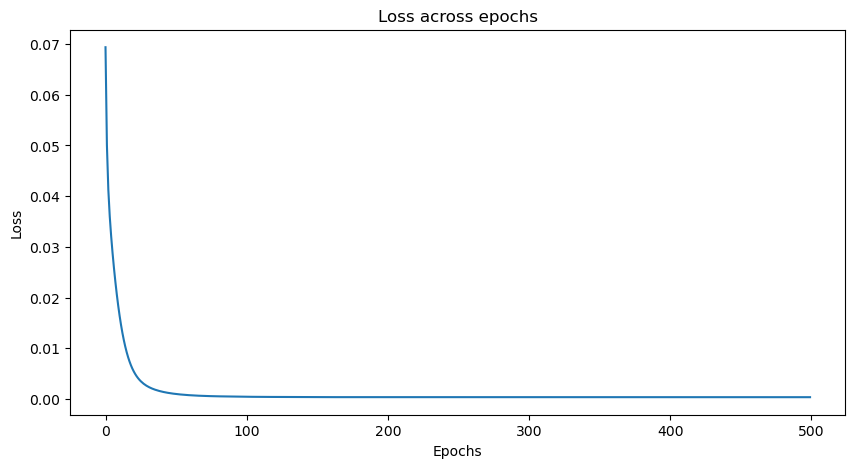

In [88]:
plt.figure(figsize=(10, 5))
plt.plot(adam_loss)
plt.title('Loss across epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [91]:
with torch.no_grad():
    predictions = model(X_test)

print(predictions)

tensor([[0.2405],
        [0.2364],
        [0.2426],
        ...,
        [0.1247],
        [0.1553],
        [0.1443]])


In [92]:
predictions_df = pd.DataFrame({'Predictions': predictions.numpy().flatten()})
predictions_df.index = predictions_df.index + 1
predictions_df.to_csv('predictions_NoReg.csv', index=True)

## Reg L1

In [93]:
#Set to 0; no L2 reg
weight_decay=0.0 

#Enables L1 Regularization
lambda_L1 = 0.0001 

model = LinearR(2950, 1)

#Binary Crosss Entropy Loss
loss_function = nn.MSELoss()
 
adam_optimizer = torch.optim.Adam(model.parameters(),lr= 0.001 ,weight_decay=weight_decay)

In [94]:
adam_loss = train_network(model,adam_optimizer,loss_function, num_epochs,batch_size,X_train,y ,lambda_L1=lambda_L1)

Epoch: 0 - Loss:0.0707
Epoch: 100 - Loss:0.0063
Epoch: 200 - Loss:0.0063
Epoch: 300 - Loss:0.0063
Epoch: 400 - Loss:0.0063


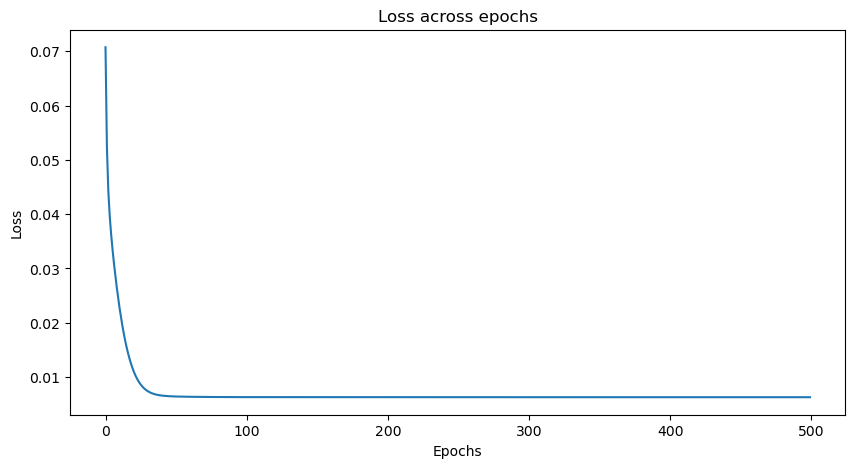

In [95]:
plt.figure(figsize=(10, 5))
plt.plot(adam_loss)
plt.title('Loss across epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [96]:
with torch.no_grad():
    predictions = model(X_test)

print(predictions)

tensor([[0.2307],
        [0.2244],
        [0.2356],
        ...,
        [0.1386],
        [0.1626],
        [0.1430]])


In [97]:
predictions_df = pd.DataFrame({'Predictions': predictions.numpy().flatten()})
predictions_df.index = predictions_df.index + 1
predictions_df.to_csv('predictions_RegL1.csv', index=True)

## Reg L2

In [100]:
num_epochs = 500
batch_size= 128
weight_decay=0.001 #Enables L2 Regularization
lambda_L1 = 0.00 #Set to 0; no L1 reg

In [101]:
model = LinearR(2950, 1)
loss_function = nn.MSELoss() #Binary Crosss Entropy Loss

In [102]:
adam_optimizer = torch.optim.Adam(model.parameters(),lr= 0.001, weight_decay=weight_decay)

In [103]:
adam_loss = train_network(model,adam_optimizer,loss_function, num_epochs,batch_size,X_train,y,lambda_L1=lambda_L1)

Epoch: 0 - Loss:0.0722
Epoch: 100 - Loss:0.0062
Epoch: 200 - Loss:0.0062
Epoch: 300 - Loss:0.0062
Epoch: 400 - Loss:0.0062


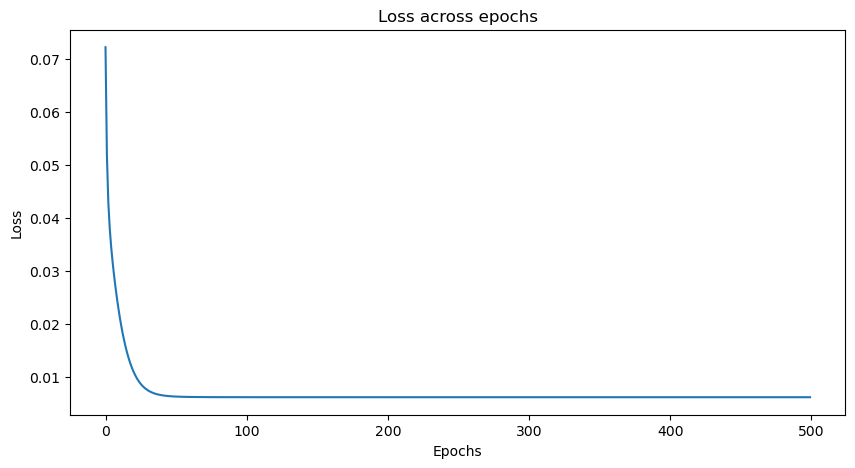

In [104]:
plt.figure(figsize=(10, 5))
plt.plot(adam_loss)
plt.title('Loss across epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [105]:
with torch.no_grad():
    predictions = model(X_test)

print(predictions)

tensor([[0.2476],
        [0.2421],
        [0.2520],
        ...,
        [0.1709],
        [0.1946],
        [0.1767]])


In [106]:
predictions_df = pd.DataFrame({'Predictions': predictions.numpy().flatten()})
predictions_df.index = predictions_df.index + 1
predictions_df.to_csv('predictions_RegL2.csv', index=True)

## Reg L2L1

In [109]:
num_epochs = 500
batch_size= 128
lambda_L1 = 0.0001 #Enabled L1
weight_decay =0.001 #Enabled L2
model = LinearR(2950, 1)
loss_function = nn.MSELoss()

In [110]:
adam_optimizer = torch.optim.Adam(model.parameters(), lr= 0.001, weight_decay=weight_decay)

In [111]:
adam_loss = train_network(model,adam_optimizer,loss_function ,num_epochs,batch_size,X_train,y,lambda_L1=lambda_L1)

Epoch: 0 - Loss:0.0713
Epoch: 100 - Loss:0.0073
Epoch: 200 - Loss:0.0073
Epoch: 300 - Loss:0.0073
Epoch: 400 - Loss:0.0073


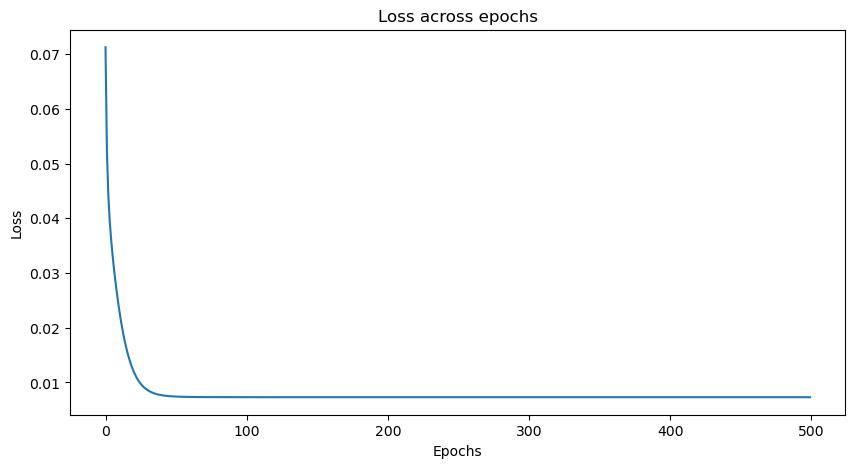

In [112]:
plt.figure(figsize=(10, 5))
plt.plot(adam_loss)
plt.title('Loss across epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [113]:
with torch.no_grad():
    predictions = model(X_test)

print(predictions)

tensor([[0.2486],
        [0.2432],
        [0.2530],
        ...,
        [0.1742],
        [0.1971],
        [0.1788]])


In [114]:
predictions_df = pd.DataFrame({'Predictions': predictions.numpy().flatten()})
predictions_df.index = predictions_df.index + 1
predictions_df.to_csv('predictions_RegL1AndL2.csv', index=True)